#### 完整代码

In [2]:
import os
import pandas as pd
import numpy as np

#导入w2v包
from gensim.corpora import WikiCorpus
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

import multiprocessing


L = 10

path = './'
save_path = path + '/w2v'
#新建保存w2v 路径，如果没有，则新建一个保存w2v路径
if not os.path.exists(save_path):
    print(save_path)
    os.makedirs(save_path)
# 读取第一期训练集，读取第二期训练集
train1 = pd.read_csv('./input/train_all.csv')
train = pd.read_csv('./input/train_2.csv')
test = pd.read_csv('./input/test_2.csv')

# 将第一期训练集，第二期训练集和测试集合并，并将空值填充为0
data = pd.concat([train, test, train1]).reset_index(drop=True).sample(frac=1, random_state=2018).fillna(0)
# 将数据集中的 ||N都替换为999
data = data.replace('\\N', 999)
#设置一个sentence 列表用于存储 句子
sentence = []
for line in list(data[['1_total_fee', '2_total_fee', '3_total_fee', '4_total_fee']].values):
    sentence.append([str(float(l)) for idx, l in enumerate(line)])

# 训练word2vec模型
print('training...')
model = Word2Vec(sentence, vector_size =L,window=2, min_count=1, workers=multiprocessing.cpu_count()
                 ) 
print('outputing...')

#遍历4个月的金额列

for fea in ['1_total_fee', '2_total_fee', '3_total_fee', '4_total_fee']:
    values = []
    #遍历每一列的值，并转成列表，并把列表中的值添至values中去
    for line in list(data[fea].values):
        values.append(line)
    #将values去重
    values = set(values)
    print(len(values))
    w2v = []
    #遍历去重后的values,并将w2v表征的特征放置w2v空列表中
    for i in values:
        a = [i]
        a.extend(model.wv[str(float(i))])
        w2v.append(a)
    out_df = pd.DataFrame(w2v)
    #将w2v转成dataFrame格式

    name = [fea]
    #dataFrame格式w2v 改列名，并且输出csv文件
    for i in range(L):
        name.append(name[0] + 'W' + str(i))
    out_df.columns = name
    out_df.to_csv(save_path + '/' + fea + '.csv', index=False)

/Users/yueyang/opt/anaconda3/envs/pytorch/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4,5,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/yueyang/opt/anaconda3/envs/pytorch/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/yueyang/opt/anaconda3/envs/pytorch/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


training...
outputing...
39983
59801
55067
43735


In [3]:
help(Word2Vec)

Help on class Word2Vec in module gensim.models.word2vec:

class Word2Vec(gensim.utils.SaveLoad)
 |  Word2Vec(sentences=None, corpus_file=None, vector_size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None, sample=0.001, seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, hashfxn=<built-in function hash>, epochs=5, null_word=0, trim_rule=None, sorted_vocab=1, batch_words=10000, compute_loss=False, callbacks=(), comment=None, max_final_vocab=None)
 |  
 |  Serialize/deserialize objects from disk, by equipping them with the `save()` / `load()` methods.
 |  
 |  Warnings
 |  --------
 |  This uses pickle internally (among other techniques), so objects must not contain unpicklable attributes
 |  such as lambda functions etc.
 |  
 |  Method resolution order:
 |      Word2Vec
 |      gensim.utils.SaveLoad
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, sentences=None, corpus_file=None, vector_size=100, alpha=0.

In [4]:
dir(Word2Vec)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adapt_by_suffix',
 '_check_corpus_sanity',
 '_check_training_sanity',
 '_clear_post_train',
 '_do_train_epoch',
 '_do_train_job',
 '_get_next_alpha',
 '_get_thread_working_mem',
 '_job_producer',
 '_load_specials',
 '_log_epoch_end',
 '_log_epoch_progress',
 '_log_progress',
 '_log_train_end',
 '_raw_word_count',
 '_save_specials',
 '_scan_vocab',
 '_smart_save',
 '_train_epoch',
 '_train_epoch_corpusfile',
 '_worker_loop',
 '_worker_loop_corpusfile',
 'add_lifecycle_event',
 'add_null_word',
 'build_vocab',
 'build_vocab_from_freq',
 'create_binary_tree',
 'estimate_memory',
 'get_latest_training_loss',
 'init_sims',
 

#### 可视化w2v聚类效果

/Users/yueyang/opt/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


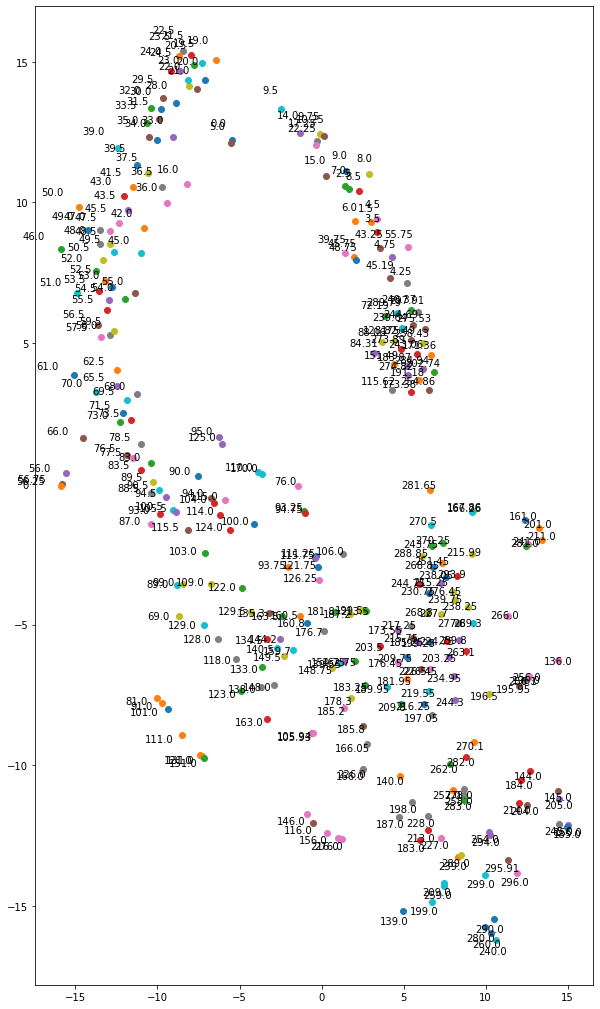

In [5]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

#读取w2v特征
df=pd.read_csv(path + '/w2v'+'/1_total_fee.csv')

#将第一个月费用转成str
l=list(df['1_total_fee'].astype('str'))
name=list(df)


def plot_with_labels(low_dim_embs, labels, filename = 'tsne.png'):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    
    # 创建自定义子图，最多遍历300个字符
    plt.figure(figsize= (10, 18))
    #遍历 300个1_total_fee字段
    for i, label in enumerate(labels):
        #将x,y设为降维后的 embedding 值
        x, y = low_dim_embs[i, :]
        # 设置xy散点图
        plt.scatter(x, y)
        # plt.annotate()函数用于标注文字-textcoords设置注释文本的坐标系属性(textcoords 选择为相对于被注释点xy的偏移量）
        #
        plt.annotate(label, xy = (x, y), textcoords = 'offset points', ha = 'right', va = 'bottom')
    plt.savefig(filename) 

tsne = TSNE(perplexity = 30, n_components = 2, init = 'pca', n_iter = 5000)






plot_only = 300
low_dim_embs = tsne.fit_transform(df.iloc[:plot_only][name[1:]])
labels = [l[i] for i in range(plot_only)]
plot_with_labels(low_dim_embs, labels)
plt.show()